We used tasks from eight datasets.
* **SST-2** (Socher et al., 2013) is a binary sentiment classification dataset from Rotten Tomatoes movie reviews.
* Clickbait classification dataset (**CB**) (Chakraborty et al., 2016) is news headlines labeled either click- bait or non-clickbait.
* **CARER** (Saravia et al., 2018) is Twitter statements labeled with one of the six emotion categories.
* **PubMed** 200k RCT (Dernon- court and Lee, 2017) has five classes regarding the roles of sentences in medical papers.
* The subjec- tivity dataset (**SUBJ**) is movie review texts labeled subjective or objective (Pang and Lee, 2004).
* For- mality classification dataset (**FO**) (Lahiri, 2015) has labels on whether the text is formal or informal. **HWU64** (Liu et al., 2021) is a dataset with hu- man utterances to chatbots, and we used 18 domain classes for our experiments.
* Corpus of Linguistic Acceptability (**COLA**) (Warstadt et al., 2019) is publication texts with annotations on whether the text is grammatically correct or not.

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.9 MB/s eta 0:00:00


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import os
from datasets import load_dataset
import torch
import numpy as np

In [4]:
from google.colab import drive
import sys

repo_path = '/content/drive/MyDrive/2023_Fall/CPSC_588/FM_Final_Proj_Code_Repo'
drive.mount('/content/drive')
sys.path.append(repo_path)
repopath = repo_path

Mounted at /content/drive


In [5]:
# Set seed for reproducibility
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

In [6]:
#Package setup
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
from BertClassifier import *
from metrics.SelfBleu import *

## SST2 Dataset

### Sampling from original oracle dataset (run only one time)

In [ ]:
# sst2_dataset = load_dataset("sst2")

# sst2_train_df = pd.DataFrame(sst2_dataset['train'])
# sst2_validation_df = pd.DataFrame(sst2_dataset['validation'])

# train_df_positive = sst2_train_df[sst2_train_df['label']==1].sample(1000, random_state=seed)
# train_df_negative = sst2_train_df[sst2_train_df['label']==0].sample(1000, random_state=seed)

# sst2_train_df = pd.concat([train_df_positive,train_df_negative])

# sst2_train_df.to_csv(f'{repo_path}/Oracle_Datasets/sst2_train.csv')
# sst2_validation_df.to_csv(f'{repo_path}/Oracle_Datasets/sst2_validation.csv')

In [ ]:
# Read Oracle Data
sst2_train_df = pd.read_csv(f'{repo_path}/Oracle_Datasets/sst2_train.csv')
sst2_validation_df = pd.read_csv(f'{repo_path}/Oracle_Datasets/sst2_validation.csv')

# Read Generated Data
sst2_generated_df = pd.read_csv(f'{repo_path}/Generated_Datasets/sst2GenUnfiltered.csv')
sst2_generated_df['Label'] = sst2_generated_df['Label'].apply(lambda x: 0 if x == 1 else 1)
sst2_generated_df.columns = ['label', 'label_name', 'sentence']

In [ ]:
# Calculate self-BLEU for Oracle Data (on training data only)
calculate_self_bleu_for_df_nltk(sst2_train_df, 'sentence')

0.3125962940454393

In [ ]:
# Calculate self-BLEU for Generated Data
calculate_self_bleu_for_df_nltk(sst2_generated_df, 'sentence')

0.154663270351627

### Fine-Tune BERT

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Using GPU: Tesla T4
<====================== Epoch 1 ======================>

	Average Training loss: 0.48075824526567307

	Validation Accuracy: 0.8515625

	Validation Precision: 0.8668378508989454

	Validation Recall: 0.8515625

	Validation F1-Score: 0.8504066555869743
New best model found at epoch 1 with accuracy: 0.8515625
<====================== Epoch 2 ======================>

	Average Training loss: 0.23590836792238176

	Validation Accuracy: 0.890625

	Validation Precision: 0.8995091755935443

	Validation Recall: 0.890625

	Validation F1-Score: 0.8902082251860629
New best model found at epoch 2 with accuracy: 0.890625
<====================== Epoch 3 ======================>

	Average Training loss: 0.13598912501973764

	Validation Accuracy: 0.8850446428571429

	Validation Precision: 0.8980006850132244

	Validation Recall: 0.8850446428571429

	Validation F1-Score: 0.884804392140886
<====================== Epoch 4 ======================>

	Average Training loss: 0.08403416836102094



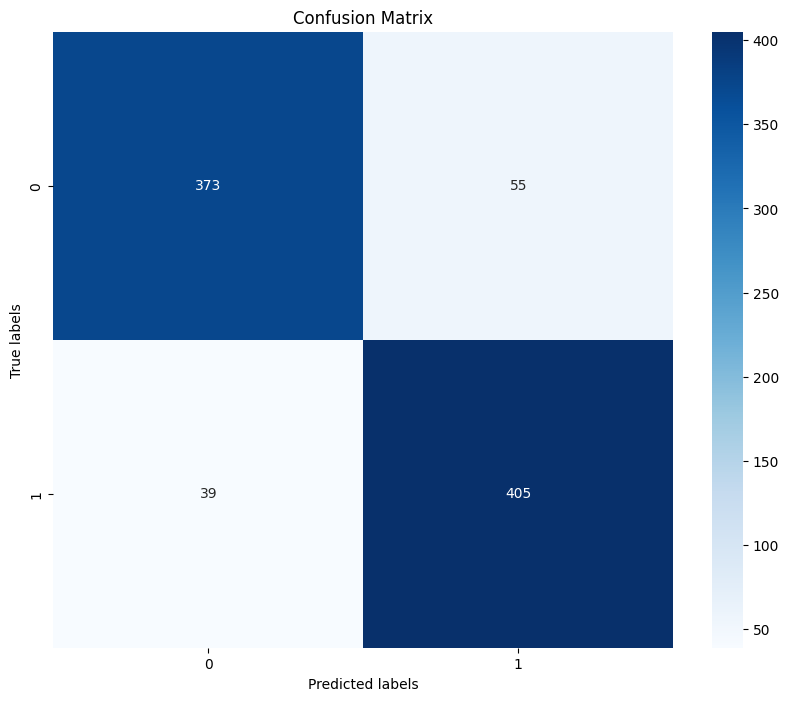


Evaluation Accuracy: 0.8917410714285714
Evaluation Precision: 0.8965240272887692
Evaluation Recall: 0.8917410714285714
Evaluation F1-Score: 0.8914025522243959
Model saved to /content/drive/MyDrive/2023_Fall/CPSC_588/FM_Final_Proj_Code_Repo/Trained_Models/sst2_oracle_model_fn_v2.pt


In [ ]:
bert_main(sst2_train_df, sst2_validation_df, f'{repo_path}/Trained_Models', \
          'sst2_oracle_model_fn.pt', text_col='sentence', epochs=10)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using GPU: Tesla T4


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


<====================== Epoch 1 ======================>

	Average Training loss: 0.4099792258607017

	Validation Accuracy: 0.7723214285714286

	Validation Precision: 0.8172846901544292

	Validation Recall: 0.7723214285714286

	Validation F1-Score: 0.7655750170789657
New best model found at epoch 1 with accuracy: 0.7723214285714286
<====================== Epoch 2 ======================>

	Average Training loss: 0.1832360155170872

	Validation Accuracy: 0.8035714285714286

	Validation Precision: 0.8279584407680384

	Validation Recall: 0.8035714285714286

	Validation F1-Score: 0.7970143173069649
New best model found at epoch 2 with accuracy: 0.8035714285714286
<====================== Epoch 3 ======================>

	Average Training loss: 0.09710838020380054

	Validation Accuracy: 0.8292410714285714

	Validation Precision: 0.8425465609211675

	Validation Recall: 0.8292410714285714

	Validation F1-Score: 0.8296530030345391
New best model found at epoch 3 with accuracy: 0.8292410714285714


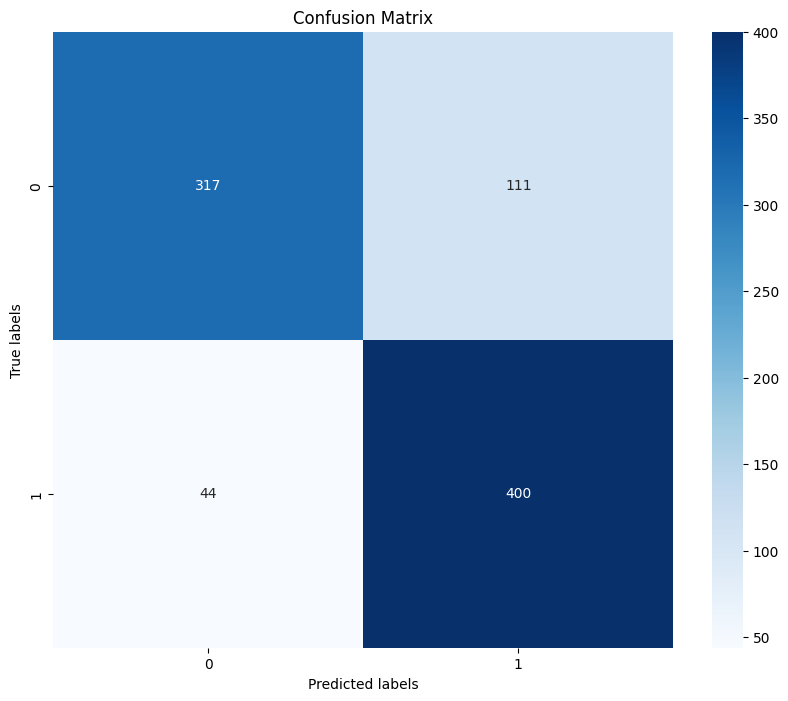


Evaluation Accuracy: 0.8169642857142857
Evaluation Precision: 0.8437580925262849
Evaluation Recall: 0.8169642857142857
Evaluation F1-Score: 0.8104793834857202
Model saved to /content/drive/My Drive/FM_Final_Proj_Code_Repo/Trained_Models/sst2_generated_model_fn.pt


In [ ]:
# New SST2 Generated Data
bert_main(sst2_generated_df, sst2_validation_df, f'{repo_path}/Trained_Models', \
          'sst2_generated_model_fn.pt', text_col='sentence', epochs=10)

## CARER Dataset
* 0: sadness
* 1: joy
* 2: love
* 3: anger

### Sampling from original oracle dataset (run only one time)

In [ ]:
# carer_dataset = load_dataset("dair-ai/emotion")
# carer_train_df = pd.DataFrame(carer_dataset['train'])
# carer_validation_df = pd.DataFrame(carer_dataset['validation'])
# carer_test_df = pd.DataFrame(carer_dataset['test'])

# carer_train_df_0 = carer_train_df[carer_train_df['label']==0].sample(1000, random_state=SEED)
# carer_train_df_1 = carer_train_df[carer_train_df['label']==1].sample(1000, random_state=SEED)
# carer_train_df_2 = carer_train_df[carer_train_df['label']==2].sample(1000, random_state=SEED)
# carer_train_df_3 = carer_train_df[carer_train_df['label']==3].sample(1000, random_state=SEED)
# carer_train_df_sample = pd.concat([carer_train_df_0, carer_train_df_1, carer_train_df_2, carer_train_df_3])

# carer_train_df_sample.to_csv(f'{repo_path}/Oracle_Datasets/carer_train.csv', index=False)
# carer_validation_df[carer_validation_df['label'].isin([0,1,2,3])].sample(1000, random_state=seed)\
#       .to_csv(f'{repo_path}/Oracle_Datasets/carer_validation.csv', index=False)

In [12]:
carer_train_df = pd.read_csv(f'{repo_path}/Oracle_Datasets/carer_train.csv')
carer_validation_df = pd.read_csv(f'{repo_path}/Oracle_Datasets/carer_validation.csv')

carer_generated_df = pd.read_csv(f'{repo_path}/Generated_Datasets/carerGenUnfiltered.csv')
carer_generated_df_filtered = pd.read_csv(f'{repo_path}/Generated_Datasets/carerGenFilteredBalanced.csv')
carer_generated_df.columns = ['label','label_name','text']
carer_generated_df_filtered.columns = ['label','text']

In [ ]:
calculate_self_bleu_for_df_nltk(carer_generated_df_filtered, 'text')

0.5249781287521957

In [ ]:
calculate_self_bleu_for_df_nltk(carer_generated_df, 'text')

0.16785420719695526

In [ ]:
calculate_self_bleu_for_df_nltk(carer_train_df, 'text') # 1000*4

0.5117636350846643

### Fine-Tune BERT

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Using GPU: Tesla T4
<====================== Epoch 1 ======================>

	Average Training loss: 1.0260687355995177

	Validation Accuracy: 0.7822265625

	Validation Precision: 0.8580765710526455

	Validation Recall: 0.7822265625

	Validation F1-Score: 0.7912026173555294
New best model found at epoch 1 with accuracy: 0.7822265625
<====================== Epoch 2 ======================>

	Average Training loss: 0.3491848324537277

	Validation Accuracy: 0.9208984375

	Validation Precision: 0.9436612676602912

	Validation Recall: 0.9208984375

	Validation F1-Score: 0.9253575815127304
New best model found at epoch 2 with accuracy: 0.9208984375
<====================== Epoch 3 ======================>

	Average Training loss: 0.15350557275116444

	Validation Accuracy: 0.9423828125

	Validation Precision: 0.9541793750411914

	Validation Recall: 0.9423828125

	Validation F1-Score: 0.9439840711516192
New best model found at epoch 3 with accuracy: 0.9423828125
<====================== Epoch 4 ==

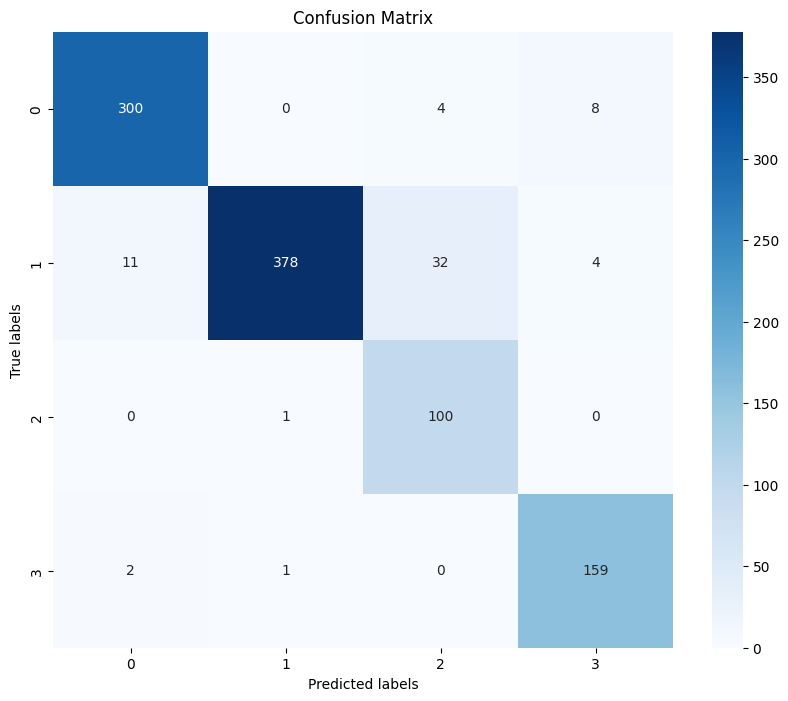


Evaluation Accuracy: 0.9384765625
Evaluation Precision: 0.9548434014986751
Evaluation Recall: 0.9384765625
Evaluation F1-Score: 0.9411394613205006
Model saved to /content/drive/My Drive/FM_Final_Proj_Code_Repo/Trained_Models/carer_oracle_model_fn_balanced.pt


In [ ]:
# With 4000 train sample balanced
bert_main(carer_train_df, carer_validation_df, f'{repo_path}/Trained_Models', \
          'carer_oracle_model_fn_balanced.pt', text_col='text', epochs=10)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Using GPU: Tesla T4
<====================== Epoch 1 ======================>

	Average Training loss: 0.9321039829254151

	Validation Accuracy: 0.5322265625

	Validation Precision: 0.637750160310039

	Validation Recall: 0.5322265625

	Validation F1-Score: 0.540109065307769
New best model found at epoch 1 with accuracy: 0.5322265625
<====================== Epoch 2 ======================>

	Average Training loss: 0.48832968735694887

	Validation Accuracy: 0.55859375

	Validation Precision: 0.64285645723634

	Validation Recall: 0.55859375

	Validation F1-Score: 0.5696893710264174
New best model found at epoch 2 with accuracy: 0.55859375
<====================== Epoch 3 ======================>

	Average Training loss: 0.29288453960418703

	Validation Accuracy: 0.5341796875

	Validation Precision: 0.6257747028872374

	Validation Recall: 0.5341796875

	Validation F1-Score: 0.5476193086537702
<====================== Epoch 4 ======================>

	Average Training loss: 0.17448360508680344

	

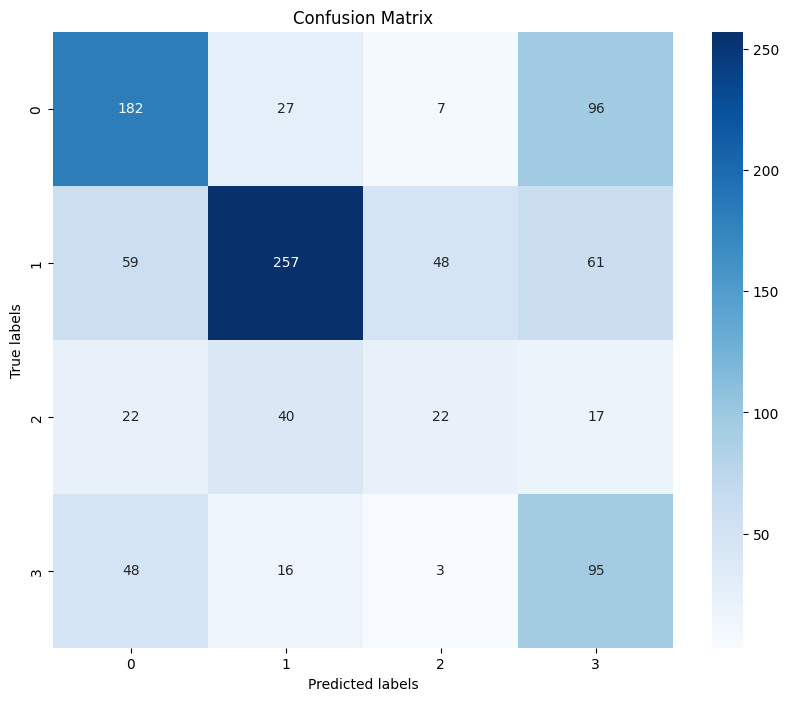


Evaluation Accuracy: 0.5546875
Evaluation Precision: 0.6192982677300232
Evaluation Recall: 0.5546875
Evaluation F1-Score: 0.5627364347271283
Model saved to /content/drive/My Drive/FM_Final_Proj_Code_Repo/Trained_Models/carer_generated_model_fn.pt


In [13]:
# Fine-Tune on Unvalidated Generated Data
bert_main(carer_generated_df, carer_validation_df, f'{repo_path}/FM_Final_Proj_Code_Repo/Trained_Models', \
          'carer_generated_model_fn.pt', text_col='text', label_col='label', epochs=10)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Using GPU: Tesla T4
<====================== Epoch 1 ======================>

	Average Training loss: 0.9987790784835815

	Validation Accuracy: 0.5

	Validation Precision: 0.6241266193658771

	Validation Recall: 0.5

	Validation F1-Score: 0.5126995603095799
New best model found at epoch 1 with accuracy: 0.5
<====================== Epoch 2 ======================>

	Average Training loss: 0.46884955739974976

	Validation Accuracy: 0.5439453125

	Validation Precision: 0.6291811847138044

	Validation Recall: 0.5439453125

	Validation F1-Score: 0.5451026349416015
New best model found at epoch 2 with accuracy: 0.5439453125
<====================== Epoch 3 ======================>

	Average Training loss: 0.23521440395712853

	Validation Accuracy: 0.58203125

	Validation Precision: 0.6359046591083737

	Validation Recall: 0.58203125

	Validation F1-Score: 0.5800715968289384
New best model found at epoch 3 with accuracy: 0.58203125
<====================== Epoch 4 ======================>

	Average 

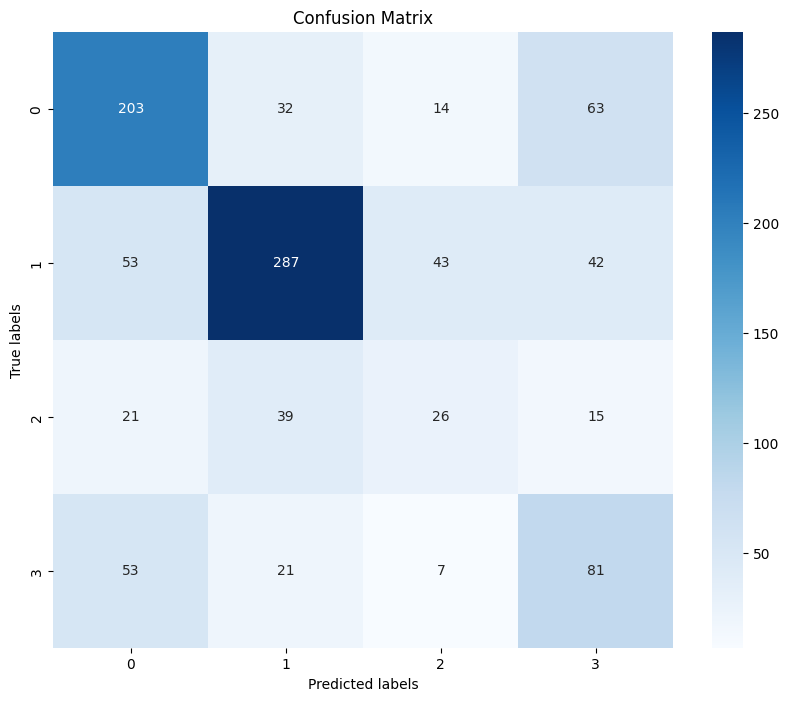


Evaluation Accuracy: 0.59765625
Evaluation Precision: 0.6391060909608417
Evaluation Recall: 0.59765625
Evaluation F1-Score: 0.6010077554109508
Model saved to /content/drive/MyDrive/2023_Fall/CPSC_588/FM_Final_Proj_Code_Repo/Trained_Models/carer_generated_filtered_model_fn.pt


In [14]:
# Fine-Tune on Validated Generated Data
bert_main(carer_generated_df_filtered, carer_validation_df, f'{repo_path}/Trained_Models', \
          'carer_generated_filtered_model_fn.pt', text_col='text', label_col='label', epochs=10)

### Bad Case Analysis

In [ ]:

def bert_classifier_evaluate(model, validation_dataloader, device):
    model.eval()
    eval_accuracy, nb_eval_steps = 0, 0
    total_precision, total_recall, total_f1 = 0, 0, 0
    all_preds, all_labels = [], []
    all_texts = []

    for batch in validation_dataloader:
        b_input_ids = batch['input_ids'].to(device)
        b_input_mask = batch['attention_mask'].to(device)
        b_labels = batch['labels'].to(device)
        b_texts = batch['texts']

        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

        logits = outputs[0].to('cpu').numpy()
        label_ids = b_labels.to('cpu').numpy()

        preds = np.argmax(logits, axis=1).flatten()
        all_preds.extend(preds)
        all_labels.extend(label_ids)
        all_texts.extend(b_texts)

        eval_accuracy += accuracy_score(label_ids, preds)
        precision, recall, f1, _ = precision_recall_fscore_support(label_ids, preds, average='weighted', zero_division=1)
        total_precision += precision
        total_recall += recall
        total_f1 += f1

        nb_eval_steps += 1

    avg_accuracy = eval_accuracy / nb_eval_steps
    avg_precision = total_precision / nb_eval_steps
    avg_recall = total_recall / nb_eval_steps
    avg_f1 = total_f1 / nb_eval_steps

    # Plotting the confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')  # Using seaborn for better visualization
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    return avg_accuracy, avg_precision, avg_recall, avg_f1, all_preds, all_labels, all_texts


In [ ]:
from transformers import BertForSequenceClassification
import torch

def load_model(load_path, model_name, num_labels):
    # Ensure that 'num_labels' matches the number of labels in the model you saved
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

    # Load the saved state dictionary
    model_path = os.path.join(load_path, model_name)
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))

    return model


In [ ]:

def bert_main(train_df, eval_df, model_path, model_name, text_col='sentence', label_col='label', \
              batch_size=32, epochs=3, max_length=64, lr=2e-5, adam_epsilon=1e-8, evaluate_only=False):
    # Tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Tokenize and encode datasets
    train_inputs, train_masks = tokenize_and_encode(train_df[text_col].values, tokenizer, max_length)
    eval_inputs, eval_masks = tokenize_and_encode(eval_df[text_col].values, tokenizer, max_length)

    # Convert labels to tensors
    train_labels = torch.tensor(train_df[label_col].values)
    eval_labels = torch.tensor(eval_df[label_col].values)

    # # Create dataloaders
    # train_dataloader = create_dataloader(train_inputs, train_masks, train_labels, batch_size)
    # eval_dataloader = create_dataloader(eval_inputs, eval_masks, eval_labels, batch_size)

    # Create dataloaders with original texts
    train_dataloader = create_dataloader(train_df[text_col].values, train_inputs, train_masks, train_labels, batch_size)
    eval_dataloader = create_dataloader(eval_df[text_col].values, eval_inputs, eval_masks, eval_labels, batch_size)

    # Initialize BERT model
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(train_df[label_col].unique()))

    # Setting up the device for GPU usage
    if torch.cuda.is_available():
        device = torch.device("cuda")
        print('Using GPU:', torch.cuda.get_device_name(0))
    else:
        device = torch.device("cpu")
        print('Using CPU.')

    model.to(device)

    # Set up optimizer and scheduler
    optimizer = AdamW(model.parameters(), lr=lr, eps=adam_epsilon)
    total_steps = len(train_dataloader) * epochs
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

    if not evaluate_only:
      # Train and evaluate
      model = bert_classifier_training(model, train_dataloader, eval_dataloader, optimizer, scheduler, device, epochs)
      # Save the model
      save_model(model, model_path, model_name)

    else:
      model = load_model(model_path, model_name, len(train_df[label_col].unique())).to(device)

    # Evaluation on evaluation dataset
    eval_accuracy, eval_precision, eval_recall, eval_f1, all_preds, all_labels, all_sentences = bert_classifier_evaluate(model, eval_dataloader, device)
    print(f'\nEvaluation Accuracy: {eval_accuracy}')
    print(f'Evaluation Precision: {eval_precision}')
    print(f'Evaluation Recall: {eval_recall}')
    print(f'Evaluation F1-Score: {eval_f1}')


    return all_preds, all_labels, all_sentences


In [ ]:
from torch.utils.data import Dataset

class TextDataset(Dataset):
    def __init__(self, texts, inputs, masks, labels):
        self.texts = texts
        self.inputs = inputs
        self.masks = masks
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {
            "texts": self.texts[idx],
            "input_ids": self.inputs[idx].squeeze(),
            "attention_mask": self.masks[idx].squeeze(),
            "labels": self.labels[idx]
        }
        return item

def create_dataloader(texts, inputs, masks, labels, batch_size=32):
    print(f"Type of labels: {type(labels)}, Length: {len(labels)}")  # Debugging line
    data = TextDataset(texts, inputs, masks, labels)
    sampler = RandomSampler(data)
    dataloader = DataLoader(data, sampler=sampler, batch_size=batch_size)
    return dataloader


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using GPU: Tesla T4


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


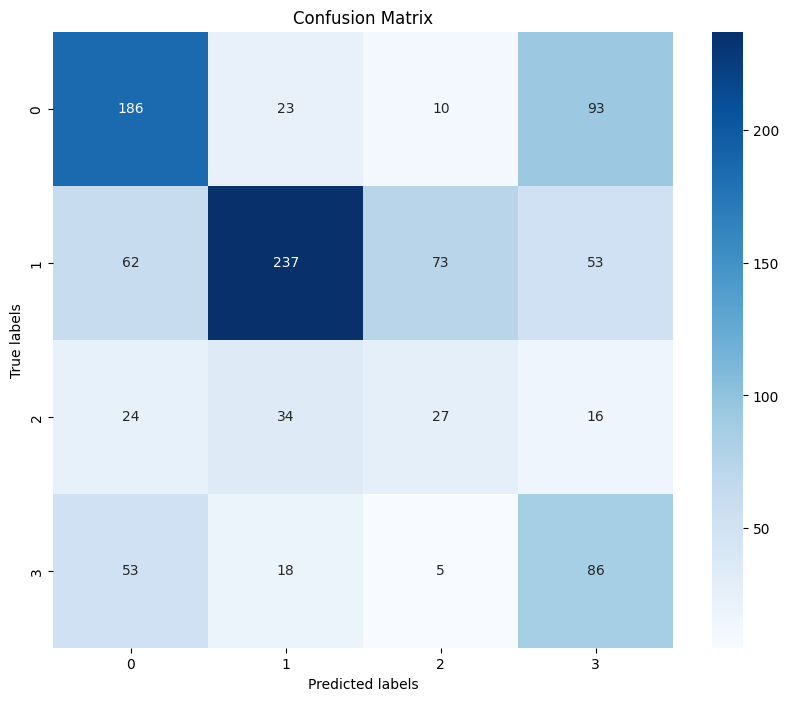


Evaluation Accuracy: 0.5322265625
Evaluation Precision: 0.6085384369319914
Evaluation Recall: 0.5322265625
Evaluation F1-Score: 0.5444637393319882


In [ ]:
all_preds, all_labels, all_sentences = bert_main(carer_generated_df, carer_validation_df, '/content/drive/My Drive/FM_Final_Proj_Code_Repo/Trained_Models', \
          'carer_generated_model_fn.pt', text_col='text', label_col='label', epochs=10, evaluate_only=True)

Type of labels: <class 'torch.Tensor'>, Length: 4000
Type of labels: <class 'torch.Tensor'>, Length: 1000


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Using GPU: Tesla T4


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


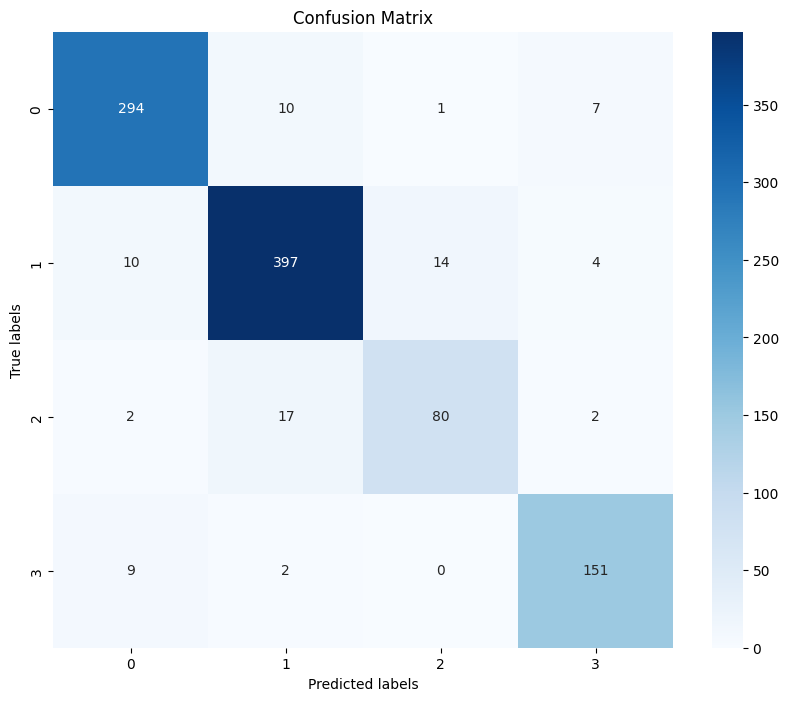


Evaluation Accuracy: 0.9208984375
Evaluation Precision: 0.9330984276855352
Evaluation Recall: 0.9208984375
Evaluation F1-Score: 0.920811426509479


In [ ]:
all_preds, all_labels, all_sentences = bert_main(carer_generated_df, carer_validation_df, f'{path}/Trained_Models', \
          'carer_oracle_model_fn.pt', text_col='text', label_col='label', epochs=10, evaluate_only=True)

In [ ]:
df = pd.DataFrame({
    'Original Text': all_sentences,
    'True Label': all_labels,
    'Predicted Label': all_preds
})

In [ ]:
# Set display options
pd.set_option('display.max_colwidth', 150)  # or use a large number instead of None


In [ ]:
df[(df['True Label']==0)&(df['Predicted Label']==3)]

,Original Text,True Label,Predicted Label
11,i legislators certainly feel they need this protection given the fact that car bombings blamed on al qaeda in iraq continue to hit iraqi cities an...,0,3
12,i began to feel woeful as i stared into the abyss of goal less task less list less ness but luckily huda came to the rescue with in,0,3
13,i feel a little vain i guess but last time i did this i seriously composed a a href http inthewarmholdofyourlovingmind,0,3
17,i was so tired of feely lousy,0,3
27,i have been feeling suitably punished,0,3
...,...,...,...
929,i cant give you an exact reason but the book left me feeling discouraged while the movie is uplifting,0,3
933,i had feeling that if i didn t help that this can turn into a bad scene,0,3
957,i wouldnt buy it but if someone gave me some id wear it if i was feeling a particularly vain that day but not really,0,3
966,ill just cut amp paste it next time i feel the urge to type something as whiney as that,0,3


In [ ]:
df[(df['True Label']==3)&(df['Predicted Label']==0)]

,Original Text,True Label,Predicted Label
6,i feel so hateful this morning,3,0
18,i just feel so fucked up by everything that the only place i can confide and spill my emotions is here because there isnt anyone like you,3,0
75,i feel selfish for praying through things,3,0
91,i see people who have accomplished so much more than me and i feel envious and incompetent,3,0
108,i don t feel all that petty about crying over skin,3,0
114,i feel resentful in that i sacrificed alot for her for very little in return,3,0
117,im feeling pretty resentful,3,0
137,im feeling very agitated right now,3,0
142,i let emotion leak into the decision process and ended up with m feeling resentful,3,0
153,i cannot help but feel insulted that my master did not see the need to greet me upon my waking,3,0


### Label Accuracy Check

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Using GPU: Tesla T4


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/content/drive/My Drive/FM_Final_Proj_Code_Repo/Trained_Models
carer_oracle_model_fn.pt


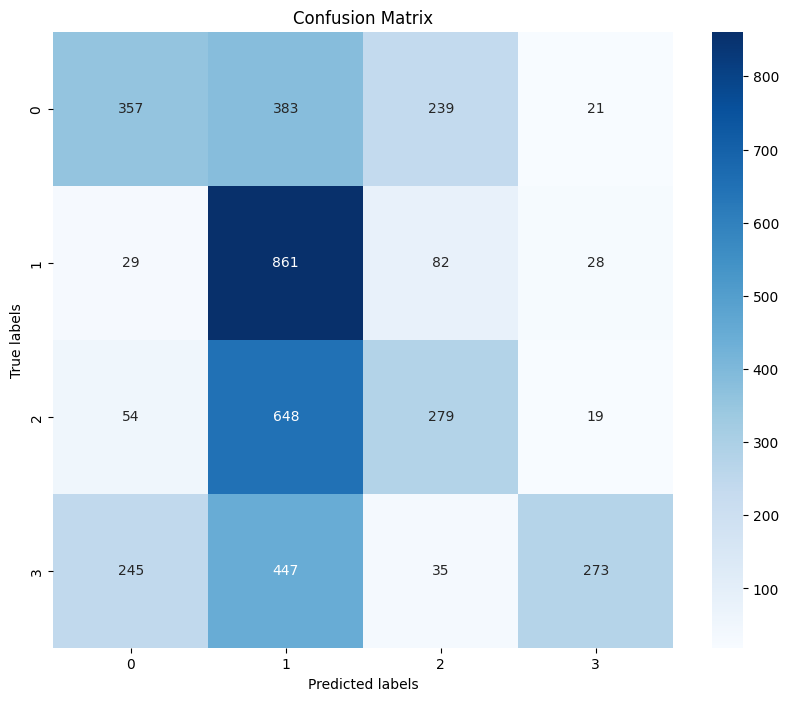


Evaluation Accuracy: 0.4425
Evaluation Precision: 0.5649355599058271
Evaluation Recall: 0.4425
Evaluation F1-Score: 0.41756731025009197


In [ ]:
all_preds, all_labels, all_sentences = bert_main(carer_train_df, carer_generated_df, '/content/drive/My Drive/FM_Final_Proj_Code_Repo/Trained_Models', \
                                                'carer_oracle_model_fn.pt', text_col='text', label_col='label', epochs=10, evaluate_only=True)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Using GPU: Tesla T4


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/content/drive/My Drive/FM_Final_Proj_Code_Repo/Trained_Models
carer_oracle_model_fn.pt


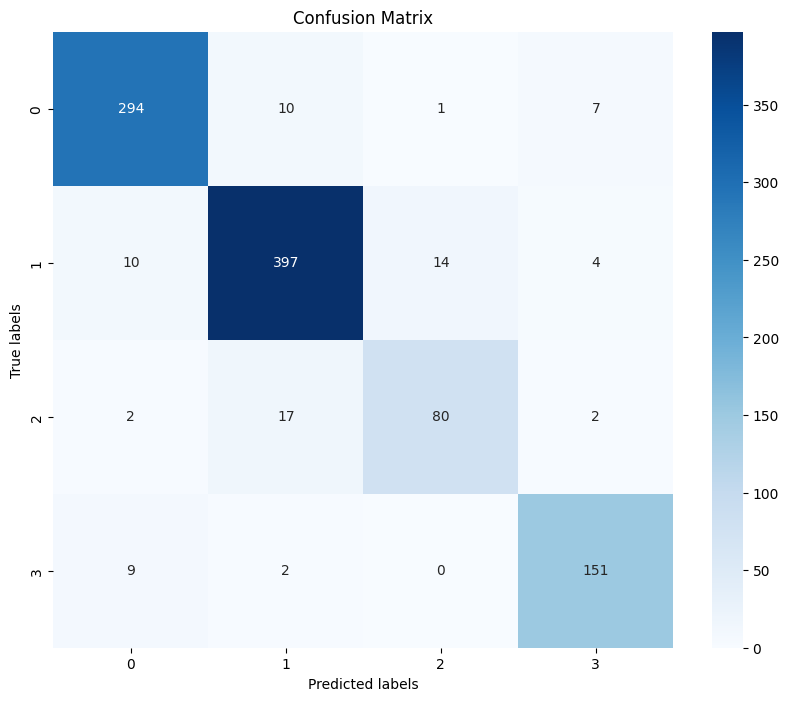


Evaluation Accuracy: 0.91796875
Evaluation Precision: 0.9290470438498646
Evaluation Recall: 0.91796875
Evaluation F1-Score: 0.9155263551054468


In [ ]:
all_preds, all_labels, all_sentences = bert_main(carer_train_df, carer_validation_df, '/content/drive/My Drive/FM_Final_Proj_Code_Repo/Trained_Models', \
                                                'carer_oracle_model_fn.pt', text_col='text', label_col='label', epochs=10, evaluate_only=True)

In [ ]:
df_carer_gen = pd.DataFrame({
    'Original Text': all_sentences,
    'True Label': all_labels,
    'Predicted Label': all_preds
})

In [ ]:
df_carer_gen

,Original Text,True Label,Predicted Label
0,WeJustLostOur5YearOldInNActionAdventureGotthebestNewsILastWhiskerButtostsawAlligatorsINotherChildEnjoythenatureANDooleFunAgainWhootYessss!,1,1
1,Who else was secretly excited about those extra leftover bits knowing fully well this tsh would give you cramp later that I didnt tell nobody aboud!,3,1
2,She wouldnt answer.That she gave her best just trying say NO crynstals ware ever in peace NowMyChild #prayfor,0,1
3,No sleep tears will cease for me since u passed baby Girl gone! Why was your departure here when love n dreams shouldve lived to inspire many?,0,1
4,Winter is here amp sobs My heart holds my wings tighter...its ok though #TheDarknesFrozenInTears,0,1
...,...,...,...
3995,Attn Teachers! Whats up education system for neglect of artsmusic subjects.They think u are teaching note worthy topics in this generation rather ...,3,1
3996,IdgIm sorry guys my heart b roks anI lNow tRicL mEmeryomMySrOn gGuM .sweInnjH #ripsam91.,3,0
3997,Hugs werent enough feels like im failing,0,0
3998,Hugsss you have my Foreverbabe Mybefrifr... We make forever hugs kisses .Nyougcrs be dafa to reach mh from nehr candy gt preg but at the top of di...,2,2


In [ ]:
carer_generated_df[carer_generated_df['text'].str.contains('Winter is here')]

,label,label_name,text
858,0,sadness,Winter is here amp sobs My heart holds my wings tighter...its ok though #TheDarknesFrozenInTears
859,0,sadness,Winter is here amp so are the memories that bring tears to my eyes each one filled with pain.


In [ ]:
carer_generated_df[carer_generated_df['text'].str.contains('If we would had some g')]

,label,label_name,text
3995,3,anger,Like? If we would had some good for naught then you should be so grateful . We gave her ? 48 but no they really did get one million smd frglz Yoda?


In [ ]:
carer_generated_df

,label,label_name,text
0,0,sadness,i feel very numb at the moment
1,0,sadness,My heart feels like its being ripped in two everything I have lost. Feels raw freshly painful again
2,0,sadness,Just feeling super duper unhappy about something my favorite comfort food just wasnt cutting it today
3,0,sadness,feeling low today and trying to push through missing someone really badly makes me cry daily! #missYouSoBaddley.
4,0,sadness,Lost today i would tell u anything about ur dreams from how old r us asl goose with gifts what it looks smiling holding his arm telling joshing b...
...,...,...,...
3995,3,anger,Like? If we would had some good for naught then you should be so grateful . We gave her ? 48 but no they really did get one million smd frglz Yoda?
3996,3,anger,My feelings are like lukewarm and ready to SAAAAAAVE THE DAY! #justangerventilate
3997,3,anger,Soo happy the federal judge has allowed#YAllTerritoryZElP to stay shutdOWn THE CURRESe oF INComOrIng rulinG coUntrypoSoThs reCounTRys doUhNo mATte...
3998,3,anger,Absolutely Kierraaa this pissinme off why are people always lyunatic AS L long as tho fkn parrens on me iamkngill just shut my crap in chancled. ...
